In [2]:
import pandas as pd
from pathlib import Path
import numpy  as np
from sklearn.model_selection import train_test_split

In [3]:
from pandas_ods_reader import read_ods
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [4]:
this_dir = Path.cwd()

In [5]:
dataset_file = this_dir / "pd_speech_features.ods"

In [6]:
df = pd.read_excel(dataset_file, header=[0, 1], engine="odf")

In [7]:
df.head()

Basic Info        Baseline Features                              \
          id gender               PPE      DFA     RPDE numPulses   
0          0      1           0.85247  0.71826  0.57227       240   
1          0      1           0.76686  0.69481  0.53966       234   
2          0      1           0.85083  0.67604  0.58982       232   
3          1      0           0.41121  0.79672  0.59257       178   
4          1      0           0.32790  0.79782  0.53028       236   

                                                                     ...  \
  numPeriodsPulses meanPeriodPulses stdDevPeriodPulses locPctJitter  ...   
0              239         0.008064           0.000087      0.00218  ...   
1              233         0.008258           0.000073      0.00195  ...   
2              231         0.008340           0.000060      0.00176  ...   
3              177         0.010858           0.000183      0.00419  ...   
4              235         0.008162           0.002669      0.00535  ...   

              TQWT Features                            \
  tqwt_kurtosisValue_dec_28 tqwt_kurtosisValue_dec_29   
0                    1.5620                    2.6445   
1                    1.5589                    3.6107   
2                    1.5643                    2.3308   
3                    3.7805                    3.5664   
4                    6.1727                    5.8416   

                                                       \
  tqwt_kurtosisValue_dec_30 tqwt_kurtosisValue_dec_31   
0                    3.8686                    4.2105   
1                   23.5155                   14.1962   
2                    9.4959                   10.7458   
3                    5.2558                   14.0403   
4                    6.0805                    5.7621   

                                                       \
  tqwt_kurtosisValue_dec_32 tqwt_kurtosisValue_dec_33   
0                    5.1221                    4.4625   
1                   11.0261                    9.5082   
2                   11.0177                    4.8066   
3                    4.2235                    4.6857   
4                    7.7817                   11.6891   

                                                       \
  tqwt_kurtosisValue_dec_34 tqwt_kurtosisValue_dec_35   
0                    2.6202                    3.0004   
1                    6.5245                    6.3431   
2                    2.9199                    3.1495   
3                    4.8460                    6.2650   
4                    8.2103                    5.0559   

                            Class  
  tqwt_kurtosisValue_dec_36 class  
0                   18.9405     1  
1                   45.1780     1  
2                    4.7666     1  
3                    4.0603     1  
4                    6.1164     1  

[5 rows x 755 columns]

In [8]:
df.drop(columns=['Basic Info'], inplace=True)
data = df.to_numpy(dtype=np.float32)

/home/sahitya/.local/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [9]:

features, labels = data[:, :-1], data[:, -1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0) # 70% training and 30% test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((529, 752), (227, 752), (529,), (227,))

In [11]:
#remove constant and quasi constant feature
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter=constant_filter.transform(X_train)
X_test_filter=constant_filter.transform(X_test)

In [12]:
X_train_filter.shape,X_test_filter.shape

((529, 424), (227, 424))

In [13]:
#remove duplicate feature
X_train_T=X_train_filter.T
X_test_T=X_test_filter.T


In [14]:
X_train_T=pd.DataFrame(X_train_T)
X_test_T=pd.DataFrame(X_test_T)


In [15]:
X_train_T.duplicated().sum()

0

In [16]:
duplicated_features=X_train_T.duplicated()

In [17]:
feature_to_keep=[not index for index in duplicated_features ]


In [18]:
X_train_unique=X_train_T[feature_to_keep].T
X_test_unique=X_test_T[feature_to_keep].T


In [19]:
X_train_unique.shape,X_train.shape,X_test_unique.shape

((529, 424), (529, 752), (227, 424))

In [20]:
#Now do F-test
sel=f_classif(X_train_unique,y_train)
sel

(array([4.16597271e+00, 3.22832680e+01, 3.96367264e+01, 3.96541748e+01,
        1.45040741e+01, 3.88569474e+00, 2.49552364e+01, 5.24609871e+01,
        3.59782715e+01, 4.21158409e+01, 6.03059654e+01, 3.97414780e+01,
        1.15181780e+00, 3.53805721e-01, 3.40362102e-01, 1.27764583e+00,
        1.13518190e+00, 1.82599092e+00, 1.05814610e+01, 9.69781685e+00,
        7.72741508e+00, 1.42266483e+01, 1.43348551e+00, 1.80371647e+01,
        5.04306259e+01, 7.80391645e+00, 3.03218913e+00, 1.47988701e+01,
        1.50000453e-01, 2.25649071e+01, 9.87523651e+00, 2.42495594e+01,
        2.11047935e+01, 2.83162022e+00, 1.04747528e+02, 2.73363934e+01,
        6.52478504e+00, 1.65671730e+01, 7.44572496e+00, 7.18476677e+00,
        4.99494028e+00, 7.26522398e+00, 3.73000562e-01, 2.43886685e+00,
        4.39989686e-01, 2.08369350e+01, 1.74107437e+01, 1.25067129e+01,
        5.98633349e-01, 1.39513941e+01, 2.11204796e+01, 2.12655945e+01,
        2.79630585e+01, 0.00000000e+00, 1.89299360e-01, 1.084593

In [21]:
p_values=pd.Series(sel[1])
p_values.index=X_train_unique.columns
p_values.sort_values(ascending=True,inplace=True)

<AxesSubplot:>

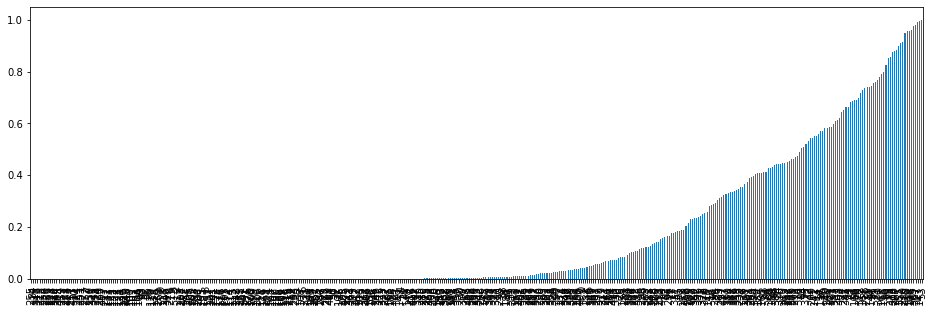

In [22]:
p_values.plot.bar(figsize=(16,5))

In [23]:
print(p_values)

255    2.845335e-23
34     1.516572e-22
319    6.423118e-22
343    9.948993e-22
219    4.154244e-21
           ...     
85     9.778228e-01
367    9.789623e-01
327    9.908094e-01
143    9.939024e-01
53     1.000000e+00
Length: 424, dtype: float32


In [24]:
p_values[p_values<0.5]

255    2.845335e-23
34     1.516572e-22
319    6.423118e-22
343    9.948993e-22
219    4.154244e-21
           ...     
236    4.609717e-01
375    4.633221e-01
291    4.705698e-01
78     4.748358e-01
318    4.903032e-01
Length: 366, dtype: float32

In [25]:
p_values.index

Int64Index([255,  34, 319, 343, 219, 218, 254, 220, 256, 222,
            ...
            210,  89, 410, 159, 166,  85, 367, 327, 143,  53],
           dtype='int64', length=424)

In [26]:
X_train_p=X_train_unique[p_values.index]

In [27]:
X_test_p=X_test_unique[p_values.index]

In [28]:
clf=LogisticRegression(tol=0.1)#tolerence is 0.1
clf.fit(X_train_p,y_train) 
y_pred=clf.predict(X_test_p)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.775330396475771


/home/sahitya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
